In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리
import warnings
warnings.filterwarnings('ignore')
# 지수표현식 실수표현식으로 변경
pd.options.display.float_format = '{:.5f}'.format

In [15]:
import pickle

In [2]:
# 2014, 2015, 2년 합산 매출, 증감률

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT "2014 구매금액" "2014", "2015 구매금액" "2015", "2014 구매금액" + "2015 구매금액" "합계",
TO_CHAR(("2015 구매금액"-"2014 구매금액")/"2015 구매금액"*100, '99.99') "증감률"
FROM 
(SELECT SUM(구매금액) "2014 구매금액" FROM PURPROD WHERE YEAR = 2014) a,
(SELECT SUM(구매금액) "2015 구매금액" FROM PURPROD WHERE YEAR = 2015) b'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['2014년 총매출액','2015년 총매출액', '총매출액', '2014년 대비 2015년 총매출액 증감률']
df1 = pd.DataFrame(x,columns=columns)
display(df1)
cursor.close()
con.commit()
con.close()

,2014년 총매출액,2015년 총매출액,총매출액,2014년 대비 2015년 총매출액 증감률
0,329601840581,347417316360,677019156941,5.13


In [3]:
# 4분기 동안의 매출액 (2014년 상반기, 하반기, 2015년 상반기, 하반기)

con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT YEAR,분기,SUM(구매금액) 총매출액 FROM PURPROD GROUP BY 분기,YEAR ORDER BY 분기, YEAR'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['year','분기', '총매출액']
df2 = pd.DataFrame(x,columns=columns)
display(df2)
cursor.close()
con.commit()
con.close()

,year,분기,총매출액
0,2014,1분기,77694762743
1,2015,1분기,84454475955
2,2014,2분기,80545967397
3,2015,2분기,84834674190
4,2014,3분기,74949714657
5,2015,3분기,79536551000
6,2014,4분기,96411395784
7,2015,4분기,98591615215


<AxesSubplot:xlabel='year'>

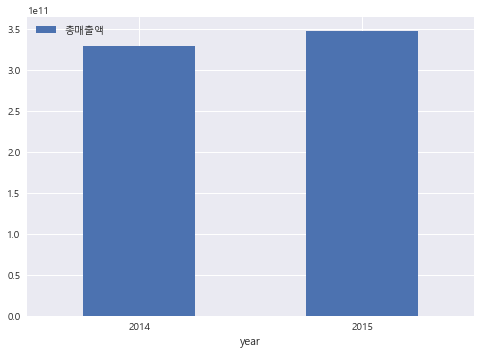

In [4]:
df2.groupby(['year']).sum().plot(kind='bar',rot = 0)

<AxesSubplot:xlabel='분기,year'>

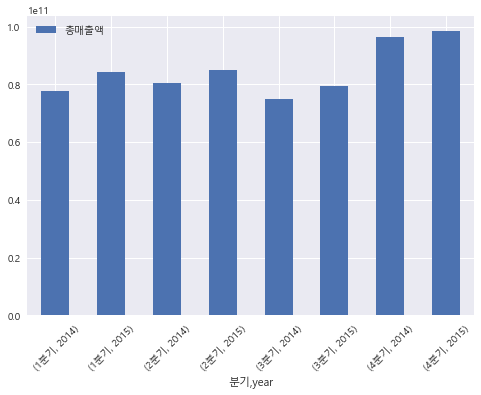

In [5]:
df2.groupby(['분기','year']).sum().plot(kind='bar',rot = 45)

<AxesSubplot:xlabel='year,분기'>

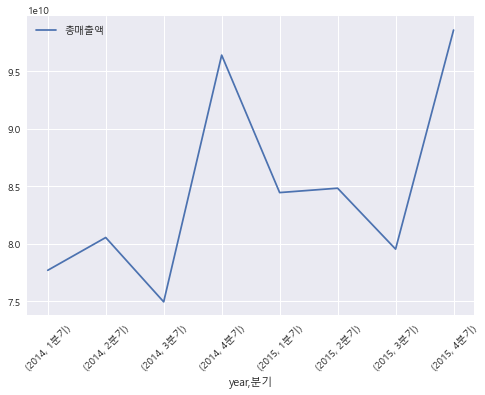

In [6]:
df2.groupby(['year','분기']).sum().plot(rot = 45)

In [7]:
# 3-2. 제휴사별 여성과 남성으로 나눠 본 연도별 매출액 , 고객별 방문횟수

import cx_Oracle
import numpy as np
import pandas as pd
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select 제휴사,성별, count(성별)구매건수,연도, sum(구매금액) 총매출액 from purprod p,custdemo c
where p.고객번호=c.고객번호 group by 제휴사,성별,연도 order by 제휴사,성별,연도'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['제휴사','성별','구매건수','연도','총매출액']
df3 = pd.DataFrame(x,columns=columns)
display(df3)
cursor.close()
con.commit()
con.close()

,제휴사,성별,구매건수,year,총매출액
0,A,F,2384553,2014,200997228750
1,A,F,2416023,2015,215252464680
2,A,M,479303,2014,48110481450
3,A,M,490439,2015,50480969150
4,B,F,5199031,2014,43361055682
5,B,F,5707997,2015,43970901587
6,B,M,1160395,2014,13009879409
7,B,M,1270651,2015,10879849800
8,C,F,3740974,2014,18806072372
9,C,F,3843508,2015,20431472048


<AxesSubplot:xlabel='제휴사', ylabel='총매출액'>

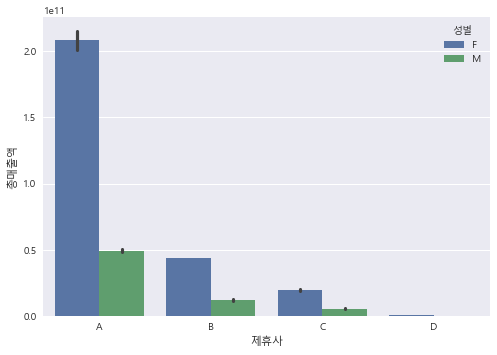

In [8]:
sns.barplot(x = '제휴사', y = '총매출액',hue = '성별', style = 'year',data = df3)

In [ ]:
sns.barplot(x = '제휴사', y = '총매출액',hue = '성별',data = df3, dodge = False)

<AxesSubplot:xlabel='제휴사', ylabel='총매출액'>

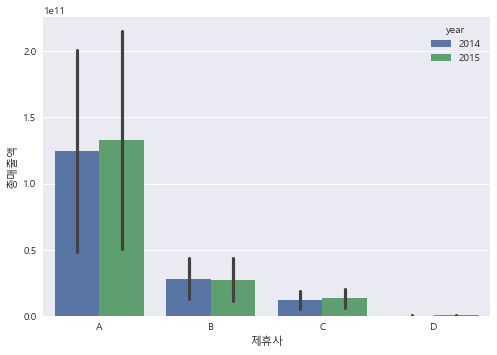

In [9]:
sns.barplot(x = '제휴사', y = '총매출액',hue = 'year',data = df3)

Text(0, 0.5, '구매건수')

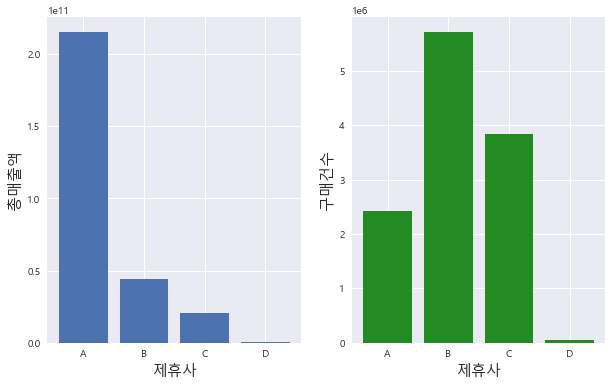

In [10]:
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.bar(df3['제휴사'],df3['총매출액'])
ax2.bar(df3['제휴사'],df3['구매건수'],color ='forestgreen')

ax1.set_xlabel('제휴사',size=15)
ax1.set_ylabel('총매출액',size=15)
ax2.set_xlabel('제휴사',size=15)
ax2.set_ylabel('구매건수',size=15)

In [11]:
# 성별별 매출

pdf1 = df3.pivot_table(index = ['성별', '제휴사'], columns = 'year', values = ['구매건수', '총매출액'])
pdf1

구매건수                   총매출액              
year       2014     2015          2014          2015
성별 제휴사                                              
F  A    2384553  2416023  200997228750  215252464680
   B    5199031  5707997   43361055682   43970901587
   C    3740974  3843508   18806072372   20431472048
   D      26222    54131     232498805     457375110
M  A     479303   490439   48110481450   50480969150
   B    1160395  1270651   13009879409   10879849800
   C     871977   922777    5004920814    5818505655
   D       9059    15990      79703299     125778330

In [12]:
# 이상치 

sns.boxplot(x = df1.species, y = df1.length)
df.groupby('species').describe()

Q1_A = df1.loc[df['species'] == 'A'].quantile(0.25)
Q3_A = df1.loc[df['species'] == 'A'].quantile(0.75)
Q1_B = df1.loc[df['species'] == 'B'].quantile(0.25)
Q3_B = df1.loc[df['species'] == 'B'].quantile(0.75)

IQR_A = Q3_A - Q1_A
IQR_B = Q3_B - Q3_B

AttributeError: 'DataFrame' object has no attribute 'species'

In [ ]:
# 2가지 막대그래프 합쳐서 비교

plt.figure(figsize = (25, 8))

plt.bar(df4['position'].value_counts().index, list(df4['position'].value_counts()), width = 0.8, label = '모든 기타 호칭') # 모든 기타 호칭
plt.bar(df5['position'].value_counts().index, list(df5['position'].value_counts()), width = 0.8, label = '기타 호칭 중에서 생존한 남성') # 기타 호칭 중에서 생존한 남성
plt.xticks(rotation = 45, size = 15)
plt.legend(fontsize = 15)

In [ ]:
# 원형그래프

df_pclass = pd.pivot_table(df,
                           values = 'survived',
                           index = 'pclass',
                           aggfunc = 'mean')

display(df_pclass)

ratio = []
for i in range(len(df_pclass['survived'])):
    a = df_pclass['survived'].iloc[i] / df_pclass['survived'].sum()
    ratio.append(a)
labels = df_pclass.index

plt.figure(figsize = (10, 10))
plt.pie(ratio, autopct = '%.1f%%', textprops = {'fontsize' : 15}, startangle = 0)
plt.legend(labels = df_pclass.index, fontsize = 20)

구매상품 테이블 분석

In [ ]:
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select 고객번호, sum(구매금액) 총구매액 from purprod group by 고객번호 
order by 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','총구매액']
purprod1 = pd.DataFrame(x,columns=columns)
display(purprod1)
cursor.close()
con.commit()
con.close()

In [ ]:
print('가장 많이 구매한 고객의 총구매액:', purprod1.총구매액.max())
print('가장 적게 구매한 고객의 총구매액:', purprod1.총구매액.min())
print('평균 구매액:', purprod1.총구매액.mean())
print('구매액 중앙값:', purprod1.총구매액.median())
print(purprod1.총구매액.quantile(q=0.25, interpolation='nearest'))
print(purprod1.총구매액.quantile(q=0.5, interpolation='nearest'))
print(purprod1.총구매액.quantile(q=0.75, interpolation='nearest'))
print(purprod1.총구매액.quantile(q=1, interpolation='nearest'))

In [ ]:
plt.boxplot(purprod1.총구매액)
plt.show()

In [ ]:
# 고객별 구매횟수
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, COUNT(*) 거래건수 FROM PURPROD GROUP BY 고객번호 ORDER BY 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','거래건수']
purprod2 = pd.DataFrame(x,columns=columns)
display(purprod2)
cursor.close()
con.commit()
con.close()

In [ ]:
purprod2.거래건수.mean()
purprod2.거래건수.describe()

In [10]:
# PRODCL이랑 PURPROD 소분류코드 기준으로 묶음
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT PR.제휴사,PR.고객번호,PR.구매금액, YEAR,분기, 분류,세분류명 FROM PRODCL PC, PURPROD PR
WHERE PC.소분류코드 = PR.소분류코드
ORDER BY 제휴사, 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['제휴사','고객번호','구매금액','연도','분기','분류','세분류명']
purprod3 = pd.DataFrame(x,columns=columns)
display(purprod3)
cursor.close()
con.commit()
con.close()

,제휴사,고객번호,구매금액,연도,분기,분류,세분류명
0,A,00001,141060,2015,3분기,의류,선매품
1,A,00001,12000,2015,2분기,외식,편의품
2,A,00001,141550,2015,3분기,의류,선매품
3,A,00001,42750,2015,3분기,의류,선매품
4,A,00001,189050,2015,3분기,의류,선매품
...,...,...,...,...,...,...,...
28593025,D,19383,1000,2015,4분기,일상용품,편의품
28593026,D,19383,8000,2015,4분기,일상용품,편의품
28593027,D,19383,2000,2015,4분기,가공식품,편의품
28593028,D,19383,1300,2015,4분기,가공식품,편의품


In [20]:
purprod3.to_csv('./purprod3.csv')

In [19]:
purprod3.describe()

,구매금액,연도
count,2.859303e+07,2.859303e+07
mean,2.367777e+04,2.014515e+03
std,2.089685e+05,4.997790e-01
min,1.000000e+00,2.014000e+03
25%,2.050000e+03,2.014000e+03
50%,4.290000e+03,2.015000e+03
75%,9.900000e+03,2.015000e+03
max,1.013300e+08,2.015000e+03


In [ ]:
sns.barplot(x = '제휴사', y = '구매금액',hue = '세분류명',data = purprod3)

In [4]:
# 전문품, year, 분기별 매출액 
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select year, 분기, sum(구매금액)총매출액 from 고객번호별세분류 where 세분류명 = '전문품' group by year, 분기 order by year, 분기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기','총매출액']
speci = pd.DataFrame(x,columns=columns)
display(speci)
cursor.close()
con.commit()
con.close()

,연도,분기,총매출액
0,2014,1분기,6681595030
1,2014,2분기,7068774780
2,2014,3분기,6015439590
3,2014,4분기,9187959630
4,2015,1분기,8287333370
5,2015,2분기,8893663610
6,2015,3분기,7798526680
7,2015,4분기,11103851600


<AxesSubplot:xlabel='분기', ylabel='총매출액'>

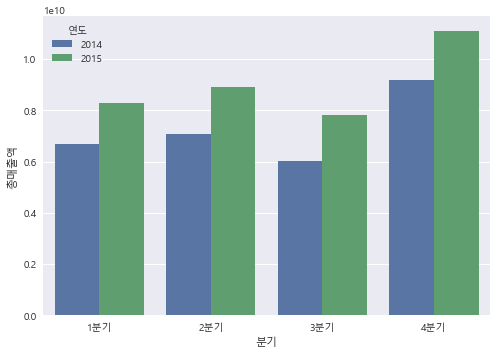

In [5]:
sns.barplot(x = '분기', y = '총매출액',hue = '연도',data = speci)

In [6]:
# 선매품, year, 분기별 매출액 
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select year, 분기, sum(구매금액)총매출액 from 고객번호별세분류 where 세분류명 = '선매품' group by year, 분기 order by year, 분기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기','총매출액']
shop = pd.DataFrame(x,columns=columns)
display(shop)
cursor.close()
con.commit()
con.close()

,연도,분기,총매출액
0,2014,1분기,40827197490
1,2014,2분기,43752646682
2,2014,3분기,36786568883
3,2014,4분기,56211002520
4,2015,1분기,42509184176
5,2015,2분기,44668091528
6,2015,3분기,37265794746
7,2015,4분기,56214123619


<AxesSubplot:xlabel='분기', ylabel='총매출액'>

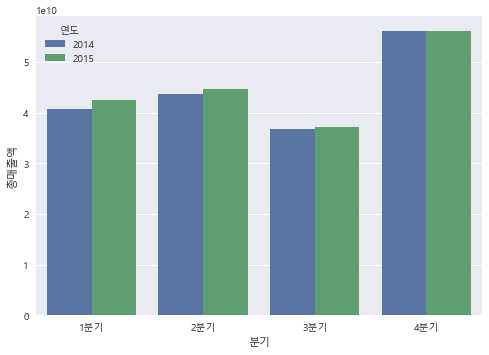

In [7]:
sns.barplot(x = '분기', y = '총매출액',hue = '연도',data = shop)

In [8]:
# 편의품, year, 분기별 매출액 
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''select year, 분기, sum(구매금액)총매출액 from 고객번호별세분류 where 세분류명 = '편의품' group by year, 분기 order by year, 분기'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연도','분기','총매출액']
conv = pd.DataFrame(x,columns=columns)
display(conv)
cursor.close()
con.commit()
con.close()

,연도,분기,총매출액
0,2014,1분기,30185970223
1,2014,2분기,29724545935
2,2014,3분기,32147706184
3,2014,4분기,31012433634
4,2015,1분기,33657958409
5,2015,2분기,31272919052
6,2015,3분기,34472229574
7,2015,4분기,31273639996


<AxesSubplot:xlabel='분기', ylabel='총매출액'>

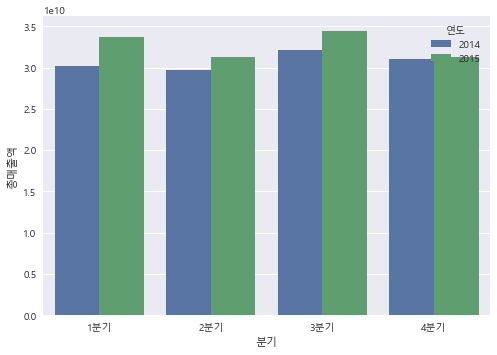

In [9]:
sns.barplot(x = '분기', y = '총매출액',hue = '연도',data = conv)

In [2]:
# RFM 분석 
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, TO_DATE('2015-12-31') - MAX(TO_DATE(구매일자)) Recency, COUNT(구매금액) Frequency, SUM(구매금액) Monetary
FROM LCL
GROUP BY 고객번호
ORDER BY 고객번호'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','Recency','Frequency','Monetary']
RFM = pd.DataFrame(x,columns=columns)
display(RFM)
cursor.close()
con.commit()
con.close()

,고객번호,Recency,Frequency,Monetary
0,00001,1,1057,85042550
1,00002,1,1116,99880760
2,00003,3,1191,3165167
3,00004,0,930,16693810
4,00005,3,719,13237070
...,...,...,...,...
19378,19379,5,584,5779280
19379,19380,1,440,3912977
19380,19381,0,805,6040669
19381,19382,0,906,4401773


In [21]:
# 값들이 치우쳐있어 왜곡이 심한 데이터라고 볼 수 있음, 특히 Recency와 Monetary는 평균과 중앙값의 차이가 크다
RFM.describe()

,Recency,Frequency,Monetary
count,19383.00000,19383.00000,19383.00000
mean,3.27994,1475.16019,34928502.13801
std,20.10762,794.79867,64353738.38655
min,0.00000,1.00000,15490.00000
25%,0.00000,851.00000,10932416.50000
50%,1.00000,1332.00000,17176238.00000
75%,2.00000,1951.00000,39356354.00000
max,727.00000,10290.00000,3571831616.00000


In [28]:
sum(RFM.Monetary)

677019156941

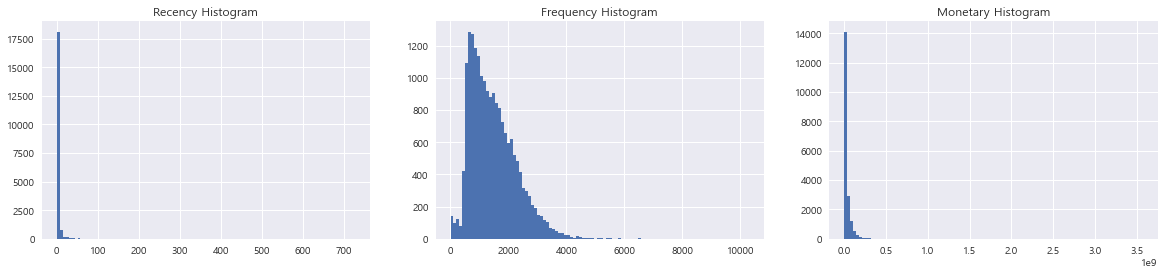

In [47]:
# 전체 제휴사 RFM 분석 
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 4), nrows =1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(RFM['Recency'], bins =100)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM['Frequency'], bins =100)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM['Monetary'], bins =100)

plt.show()

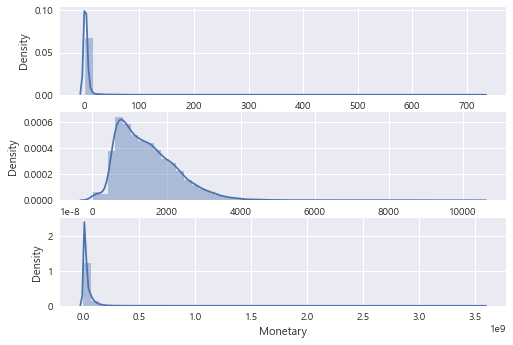

In [22]:
plt.Figure(figsize = (12,10))

# R의 플롯 분포
plt.subplot(3,1,1)
sns.distplot(RFM['Recency'])

plt.subplot(3,1,2)
sns.distplot(RFM['Frequency'])

plt.subplot(3,1,3)
sns.distplot(RFM['Monetary'])

plt.show()

In [29]:
RFM["FrequencyScore"] = pd.cut(RFM["Frequency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Frequency"], 25), 
                                             np.percentile(RFM["Frequency"], 50), 
                                             np.percentile(RFM["Frequency"], 75), 
                                             RFM["Frequency"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

In [31]:
RFM["MonetaryScore"] = pd.cut(RFM["Monetary"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Monetary"], 25), 
                                             np.percentile(RFM["Monetary"], 50), 
                                             np.percentile(RFM["Monetary"], 75), 
                                             RFM["Monetary"].max()], 
                                    labels=[1, 2, 3, 4]).astype("int")

In [32]:
# Recency Score 역레이블
RFM["RecencyScore"] = pd.cut(RFM["Recency"], 
                                       bins=[-1, 
                                         np.percentile(RFM["Recency"], 25), 
                                             np.percentile(RFM["Recency"], 50), 
                                             np.percentile(RFM["Recency"], 75), 
                                             RFM["Recency"].max()], 
                                    labels=[4, 3, 2, 1]).astype("int")

In [34]:
RFM["RFM"] = RFM["RecencyScore"] + RFM["FrequencyScore"] + RFM["MonetaryScore"]

In [35]:
# 하지만 이 방법으로 계산했을 때 고객수명 주기로 인한 편향이 있을 수 있음 https://towardsdatascience.com/an-rfm-customer-segmentation-with-python-cf7be647733d
RFM

,고객번호,Recency,Frequency,Monetary,FrequencyScore,MonetaryScore,RecencyScore,RFM
0,00001,1,1057,85042550,2,4,3,9
1,00002,1,1116,99880760,2,4,3,9
2,00003,3,1191,3165167,2,1,1,4
3,00004,0,930,16693810,2,2,4,8
4,00005,3,719,13237070,1,2,1,4
...,...,...,...,...,...,...,...,...
19378,19379,5,584,5779280,1,1,1,3
19379,19380,1,440,3912977,1,1,3,5
19380,19381,0,805,6040669,1,1,4,6
19381,19382,0,906,4401773,2,1,4,7


In [ ]:
# 왜곡 정도가 높은 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정한 뒤 k-평균 수행
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


In [37]:
# RFM 분석 
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 고객번호, 제휴사, TO_DATE(20151231)-MAX(TO_DATE(구매일자)) Recency, COUNT(구매금액) Frequency, SUM(구매금액) Monetary
FROM LCL
GROUP BY 고객번호, 제휴사
ORDER BY 고객번호, 제휴사'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['고객번호','제휴사','Recency','Frequency','Monetary']
RFM_abcd = pd.DataFrame(x,columns=columns)
display(RFM_abcd)
cursor.close()
con.commit()
con.close()

RFM_A = RFM_abcd.loc[RFM_abcd['제휴사'] == 'A']
RFM_B = RFM_abcd.loc[RFM_abcd['제휴사'] == 'B']
RFM_C = RFM_abcd.loc[RFM_abcd['제휴사'] == 'C']
RFM_D = RFM_abcd.loc[RFM_abcd['제휴사'] == 'D']

,고객번호,제휴사,Recency,Frequency,Monetary
0,00001,A,1,874,83227150
1,00001,B,15,64,790976
2,00001,C,5,119,1024424
3,00002,A,1,1080,99454850
4,00002,B,230,16,209450
...,...,...,...,...,...
58626,19382,C,90,3,7990
58627,19383,A,9,18,1104800
58628,19383,B,155,16,48600
58629,19383,C,169,3,8590


In [42]:
RFM_D.describe()

,Recency,Frequency,Monetary
count,3791.00000,3791.00000,3791.00000
mean,171.15616,27.80322,236179.25191
std,179.62828,84.92816,747233.46153
min,0.00000,1.00000,250.00000
25%,28.00000,1.00000,9900.00000
50%,109.00000,3.00000,29300.00000
75%,264.00000,9.00000,96800.00000
max,729.00000,880.00000,13090250.00000


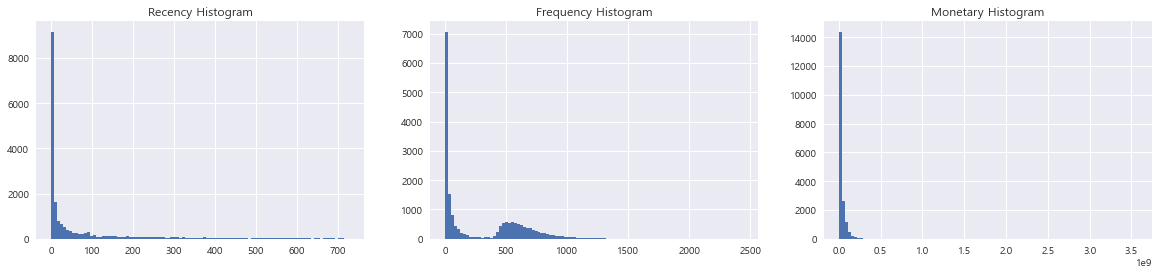

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 4), nrows =1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(RFM_A['Recency'], bins =100)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM_A['Frequency'], bins =100)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM_A['Monetary'], bins =100)
plt.show()

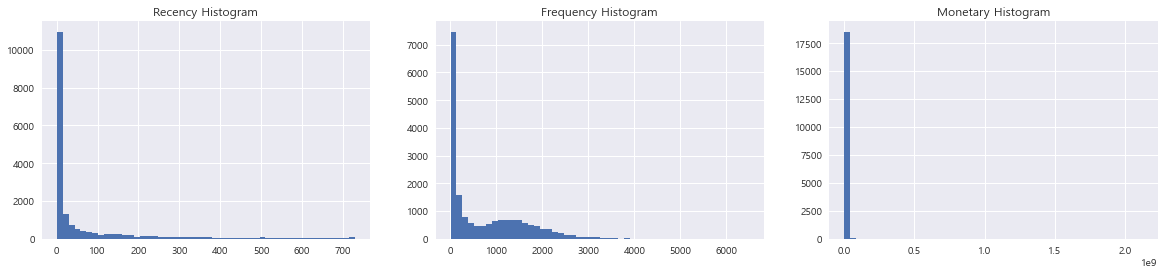

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 4), nrows =1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(RFM_B['Recency'], bins =50)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM_B['Frequency'], bins =50)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM_B['Monetary'], bins =50)
plt.show()

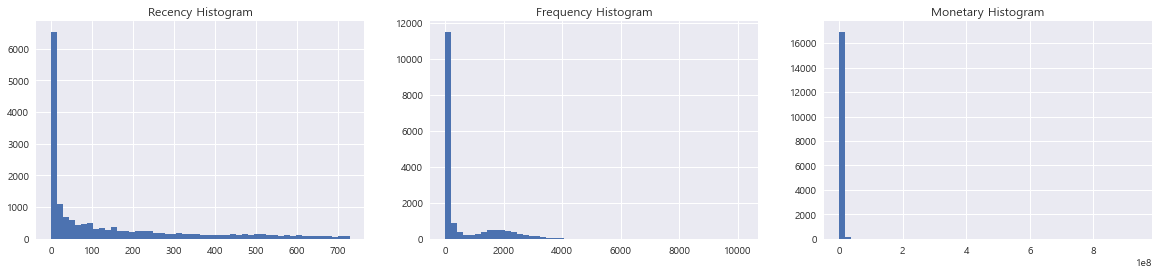

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 4), nrows =1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(RFM_C['Recency'], bins =50)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM_C['Frequency'], bins =50)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM_C['Monetary'], bins =50)
plt.show()

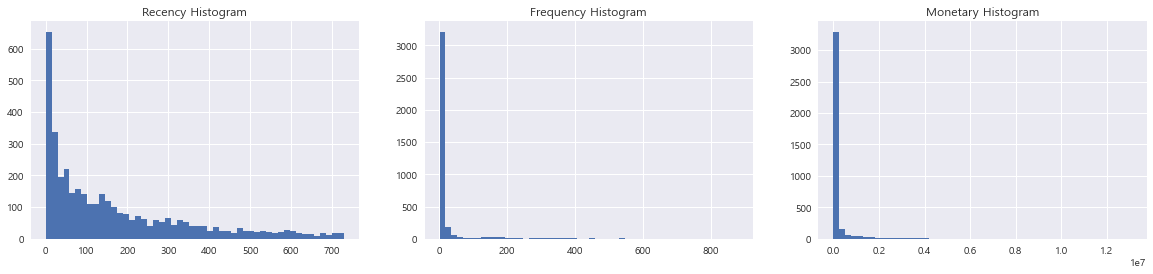

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 4), nrows =1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(RFM_D['Recency'], bins =50)

ax2.set_title('Frequency Histogram')
ax2.hist(RFM_D['Frequency'], bins =50)

ax3.set_title('Monetary Histogram')
ax3.hist(RFM_D['Monetary'], bins =50)
plt.show()

In [3]:
# 연령대별 분석
con = cx_Oracle .connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='''SELECT 연령대, COUNT(연령대) 고객수, SUM(구매금액) 총매출액 FROM LCL
GROUP BY 연령대 
ORDER BY 연령대'''
cursor.execute(sql)
x = cursor.fetchall()
columns = ['연령대','고객수','총매출액']
agegroup = pd.DataFrame(x,columns=columns)
display(agegroup)
cursor.close()
con.commit()
con.close()

,연령대,고객수,총매출액
0,19세이하,19470,140593647
1,20세~24세,255610,3929990387
2,25세~29세,742097,18624980673
3,30세~34세,2291194,51126952633
4,35세~39세,4328086,102581074645
5,40세~44세,5934913,124258607541
6,45세~49세,6450821,131191999671
7,50세~54세,4453475,110464032296
8,55세~59세,2431848,74073428801
9,60세이상,1685516,60627496647


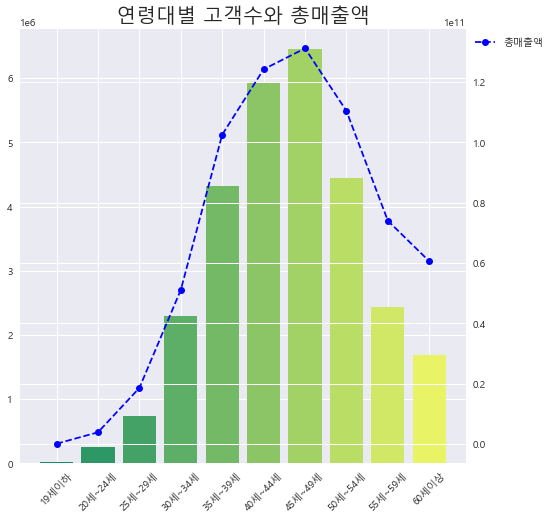

In [12]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(agegroup.연령대))

xtick_label_position = list(range(len(agegroup.연령대)))
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(agegroup.연령대, rotation = 45)
ax1.bar(xtick_label_position,agegroup.고객수, color = colors)

color = 'blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,agegroup.총매출액, color = 'b', linestyle='--',marker='o')
plt.title('연령대별 고객수와 총매출액',fontsize=20)
plt.legend(labels =['총매출액','고객수'],loc = 2, bbox_to_anchor = (1,1) )
plt.show()

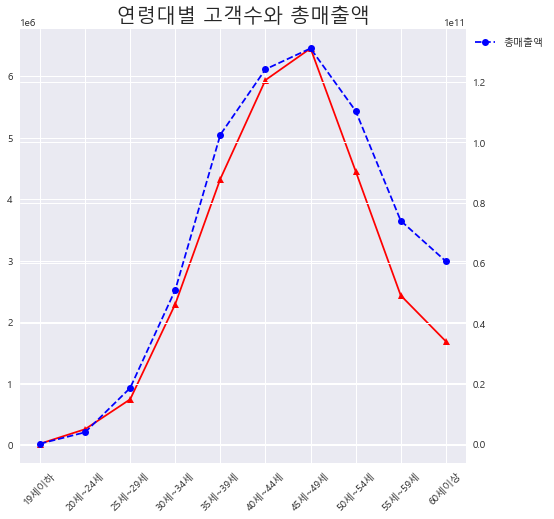

In [13]:
fig = plt.figure(figsize = (8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(agegroup.연령대))

xtick_label_position = list(range(len(agegroup.연령대)))
ax1.set_xticks(xtick_label_position)
ax1.set_xticklabels(agegroup.연령대, rotation = 45)

ax1.plot(xtick_label_position,agegroup.고객수, color = 'r',linestyle='-',marker='^' )

color = 'blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position,agegroup.총매출액, color = 'b', linestyle='--',marker='o')

plt.title('연령대별 고객수와 총매출액',fontsize=20)
plt.legend(labels =['총매출액','고객수'],loc = 2, bbox_to_anchor = (1,1) )
plt.show()

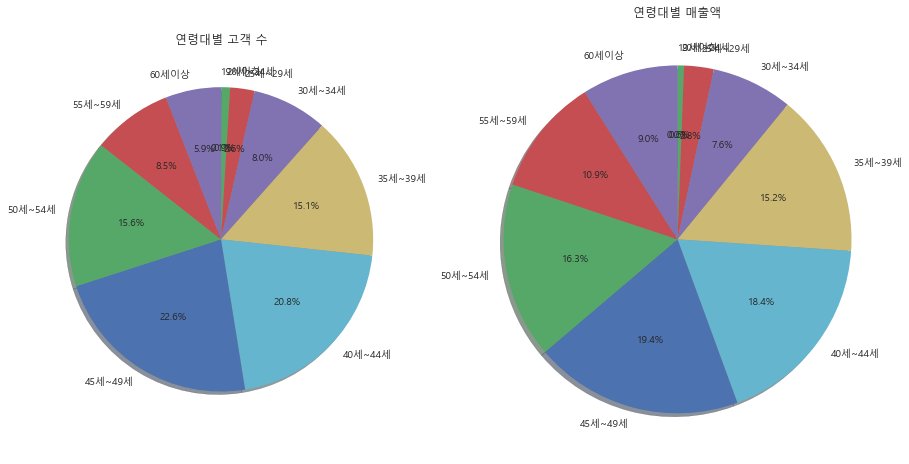

In [77]:
fig, ax = plt.subplots(1,2,figsize = (15,8))

plt.axis('equal')
plt.subplot(121)
plt.title('연령대별 고객 수')
plt.pie(agegroup.고객수, labels = agegroup.연령대, autopct = '%1.1f%%', shadow = True, startangle= 90,counterclock=False)


plt.subplot(122)
plt.title('연령대별 매출액')
plt.pie(agegroup.총매출액, labels = agegroup.연령대, autopct = '%1.1f%%', shadow = True, startangle= 90,counterclock=False)
plt.show()

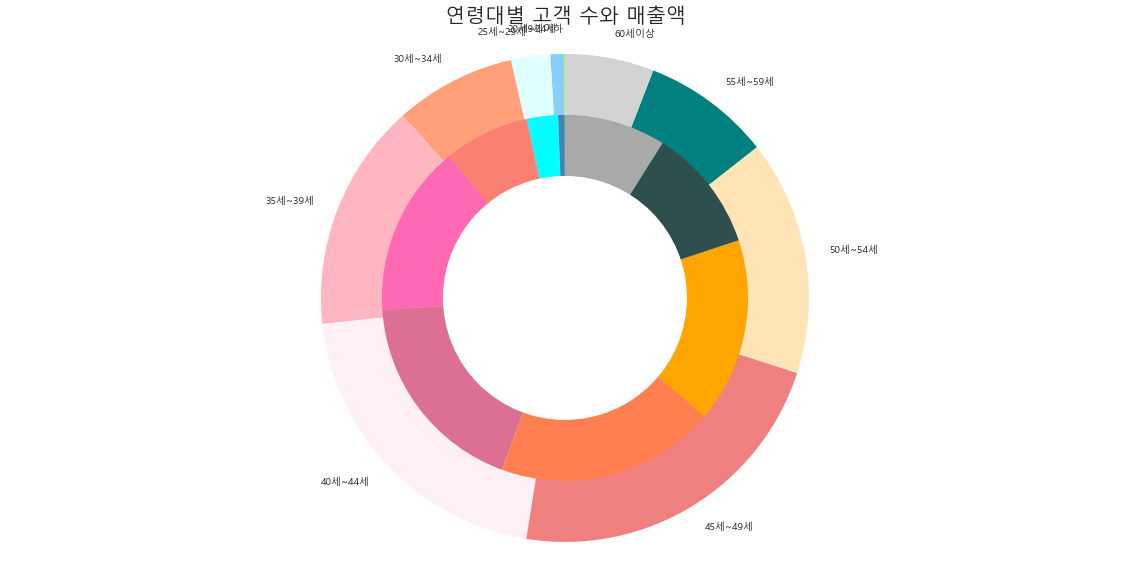

In [94]:
fig = plt.figure(figsize = (20,10))

plt.title('연령대별 고객 수와 매출액',fontsize = 20)
plt.pie(agegroup.고객수, labels = agegroup.연령대,startangle= 90, radius = 1, 
        colors= ['greenyellow','lightskyblue','lightcyan','lightsalmon','lightpink','lavenderblush','lightcoral','moccasin','teal','lightgray'])

plt.pie(agegroup.총매출액,startangle= 90, radius = 0.75,
       colors= ['darkseagreen','steelblue','cyan','salmon','hotpink','palevioletred','coral','orange','darkslategray','darkgray'])

centre_circle = plt.Circle((0,0),0.50,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.show()

In [97]:
# 년도 제휴사별 세분류 비율
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic') # 한글 입력
plt.rcParams['axes.unicode_minus'] = False # 글꼴 변경시 마이너스 표기 가능으로 처리
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()
sql ='SELECT PRODCL.제휴사,연도,PRODCL.세분류명,SUM(구매금액) FROM PURPROD,PRODCL WHERE PURPROD.제휴사 = PRODCL.제휴사 \
GROUP BY PRODCL.제휴사,연도,PRODCL.세분류명 ORDER BY 연도,제휴사'
cursor.execute(sql)
x = cursor.fetchall()
columns = ['제휴사','년','분류명','합계']
df = pd.DataFrame(x,columns=columns)
display(df)
cursor.close()
con.commit()
con.close()

,제휴사,년,분류명,합계
0,A,2014,선매품,105372561414600
1,A,2014,전문품,6476800465200
2,A,2014,편의품,45088495546200
3,B,2014,선매품,43349249084979
4,B,2014,전문품,169112805273
5,B,2014,편의품,104398971788532
6,C,2014,선매품,2571587264088
7,C,2014,편의품,20929863010494
8,D,2014,선매품,4370829456
9,D,2014,편의품,40898475624


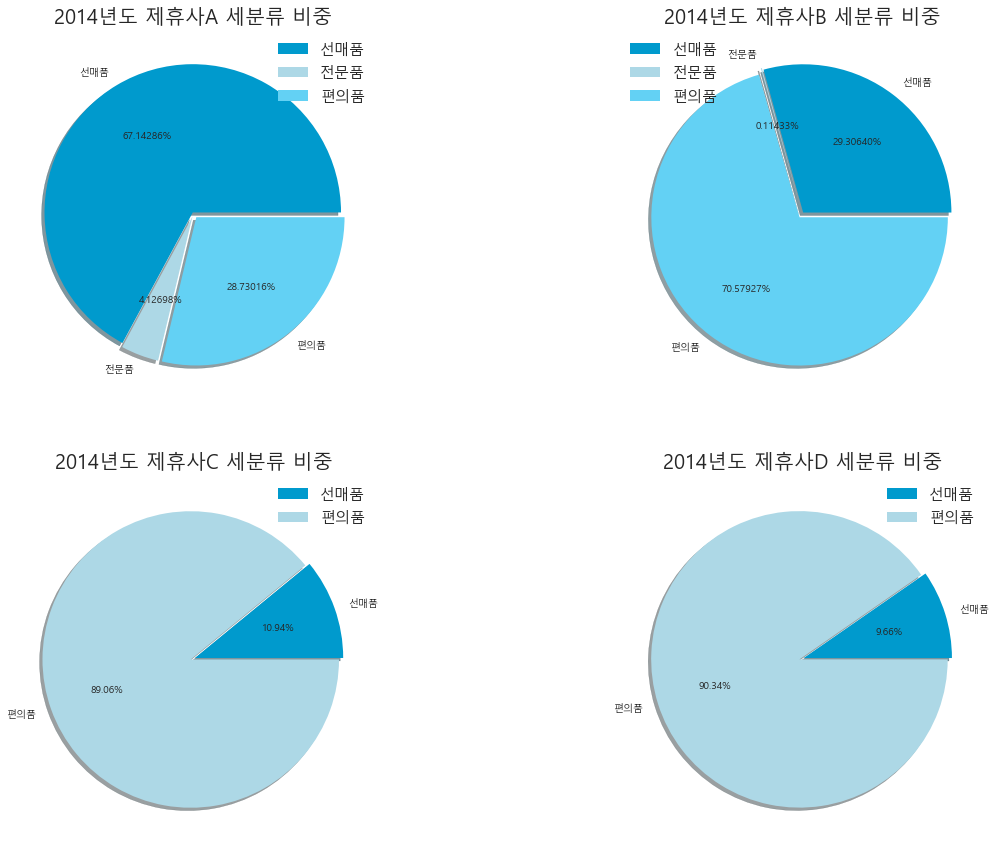

In [98]:
# 2014년도 세분류 비중 파이그래프
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df_A_2014=df.loc[0:2]
ax1.set_title("2014년도 제휴사A 세분류 비중",size=20)
ax1.pie(df_A_2014['합계'],shadow = True, labels = df_A_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02,0.03))

df_B_2014=df.loc[3:5]
ax2.set_title("2014년도 제휴사B 세분류 비중",size=20)
ax2.pie(df_B_2014['합계'],shadow = True, labels = df_B_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02,0.03))

df_C_2014=df.loc[6:7]
ax3.set_title("2014년도 제휴사C 세분류 비중",size=20)
ax3.pie(df_C_2014['합계'],shadow = True, labels = df_C_2014['분류명'], autopct='%.2f%%',colors=color_palette_list,explode=(0.01,0.02))

df_D_2014=df.loc[8:9]
ax4.set_title("2014년도 제휴사D 세분류 비중",size=20)
ax4.pie(df_D_2014['합계'],shadow = True, labels = df_D_2014['분류명'], autopct='%.2f%%',colors=color_palette_list,explode=(0.01,0.02))
ax1.legend(fontsize = '15')
ax2.legend(fontsize = '15')
ax3.legend(fontsize = '15')
ax4.legend(fontsize = '15')
plt.show()

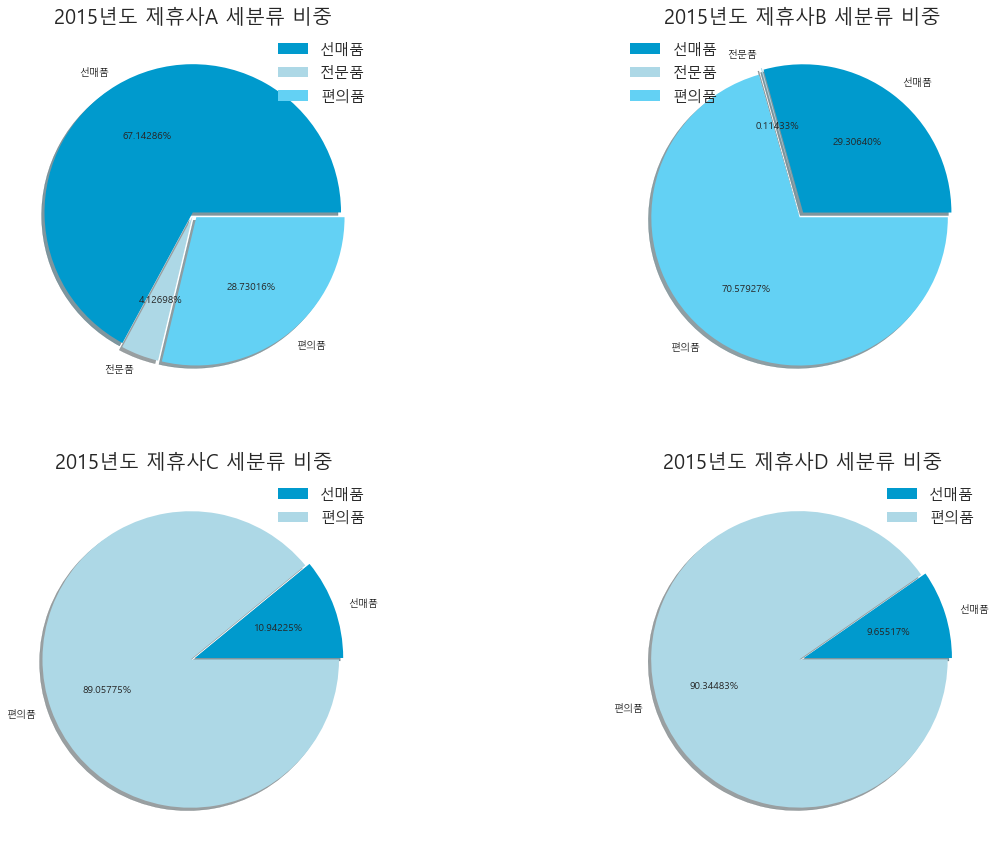

In [99]:
# 2015년도 세분류 비중 파이그래프
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
fig = plt.figure(figsize = (20, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df_A_2014=df.loc[10:12]
ax1.set_title("2015년도 제휴사A 세분류 비중",size=20)
ax1.pie(df_A_2014['합계'],shadow = True, labels = df_A_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02,0.03))

df_B_2014=df.loc[13:15]
ax2.set_title("2015년도 제휴사B 세분류 비중",size=20)
ax2.pie(df_B_2014['합계'],shadow = True, labels = df_B_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02,0.03))

df_C_2014=df.loc[16:17]
ax3.set_title("2015년도 제휴사C 세분류 비중",size=20)
ax3.pie(df_C_2014['합계'],shadow = True, labels = df_C_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02))

df_D_2014=df.loc[18:19]
ax4.set_title("2015년도 제휴사D 세분류 비중",size=20)
ax4.pie(df_D_2014['합계'],shadow = True, labels = df_D_2014['분류명'], autopct='%.5f%%',colors=color_palette_list,explode=(0.01,0.02))
ax1.legend(fontsize = '15')
ax2.legend(fontsize = '15')
ax3.legend(fontsize = '15')
ax4.legend(fontsize = '15')
plt.show()